In [1]:
%reload_ext autoreload
%autoreload 2
# check data path
import os, sys
path=os.path.abspath(os.getcwd())
sys.path.append('../driver')
sys.path.append('../../driver')
sys.path.append('../../../messungen/')

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import fmr_eva as fmr_eva
# import fmr_eva2 as fmr_eva2
# import fmr_read as fmr_read
# import fmr_read2 as fmr_read2

import FMR_Reader_v210208 as FMR_Reader
import FMR_Evaluator_v210331 as FMR_eva
import corporate_design_colors_v3 as cpd

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

no style found


In [2]:
dataset='VNA(T) without preamplifier'
d_ohne=FMR_Reader.read(dataset, loc='../../../messungen/')

100%|██████████| 2401/2401 [01:24<00:00, 28.49it/s]


Wait at least up to 5 min.


In [3]:
dataset='VNA(T) with preamplifier'
d_pa=FMR_Reader.read(dataset, loc='../../../messungen/')

100%|██████████| 2401/2401 [01:27<00:00, 27.32it/s]


Wait at least up to 5 min.


In [4]:
dataset='VNA(T) with boxxed and tempered preamplifier'
d_bpa=FMR_Reader.read(dataset, loc='../../../messungen/')

100%|██████████| 2401/2401 [02:11<00:00, 18.25it/s]


tempered at 25°C


In [5]:
db_bpa=FMR_eva.complex_binning(d_bpa)
db_wopa=FMR_eva.complex_binning(d_ohne)
db_pa=FMR_eva.complex_binning(d_pa)

In [6]:
dn_bpa=FMR_eva.normS21(d_bpa)
dn_wopa=FMR_eva.normS21(d_ohne)
dn_pa=FMR_eva.normS21(d_pa)

In [7]:
d_wopa=d_ohne

In [8]:
d_bpa,dn_bpa

({'version': 'version from 20210422',
  'T_RT(H)': array([20.92570588, 20.9       , 20.9       , ...,         nan,
                 nan,         nan]),
  'comment': 'tempered at 25°C',
  'f': array([ 2.  ,  2.02,  2.04, ..., 26.96, 26.98, 27.  ]),
  'H': array([0.0000e+00, 5.0000e-04, 1.0000e-03, ..., 1.1980e+00, 1.1985e+00,
         1.1990e+00]),
  'S21': array([[-5.99846105+3.86075454j, -5.99879091+3.86098361j,
          -5.99923256+3.8612781j , ..., -6.00258209+3.85473678j,
          -6.00188905+3.85434358j, -6.00262503+3.8544682j ],
         [ 3.26150488+6.25187208j,  3.26175005+6.25239017j,
           3.26192583+6.25255063j, ...,  3.25509526+6.25556837j,
           3.25488332+6.25513673j,  3.25487624+6.25550528j],
         [ 6.64370111-2.7978764j ,  6.64390628-2.79797237j,
           6.64380522-2.79801434j, ...,  6.64581239-2.79111262j,
           6.64538804-2.79092829j,  6.6460468 -2.79094756j],
         ...,
         [-4.60748684-3.461189j  , -4.60874471-3.46188082j,
          -

In [9]:
np.shape(d_pa['t']),np.shape(d_wopa['t'])
t_pa=d_pa['t']-d_pa['t'][0]
t_bpa=d_bpa['t']-d_bpa['t'][0]
t_wopa=d_wopa['t']-d_wopa['t'][0]
t_pa,t_wopa,t_bpa
tmax=int(np.array(np.mean([t_pa[-1],t_wopa[-1],t_bpa[-1]]),dtype='float64'))/3600
tlen=np.shape(t_pa)[0]
t=np.linspace(0,tmax,tlen)
tmax,tlen, t

T_pa=d_pa['T_RT(H)']
T_bpa=d_bpa['T_RT(H)']
T_wopa=d_wopa['T_RT(H)']

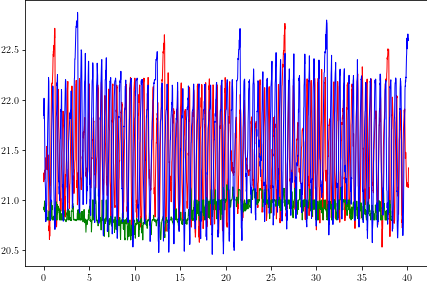

In [10]:
T_bpa[T_bpa>60]=np.nan

%matplotlib inline
plt.plot(t,T_pa, 'r')
plt.plot(t,T_bpa, 'g')
plt.plot(t,T_wopa, 'b')

In [27]:
img_wopa=20*np.log10(np.abs(dn_wopa['S21']))*100
img_pa=20*np.log10(np.abs(dn_pa['S21']))*100
img_bpa=20*np.log10(np.abs(dn_bpa['S21']))*100
f=dn_pa['f']
H=t

Hlim=(0,50)
flim=(0,40)
contrast=1
fig_nr=0

xlabel_up='$\Rightarrow \mu_0H$ [T]'
xlabel_down='$\Leftarrow \mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
clabel_wopa='$T^n_{21}$ [0.01 dB]'
clabel_pa='$T^n_{21}$ [0.01 dB]'
clabel_bpa='$T^n_{21}$ [0.01 dB]'

# correct image framing
stepsizeH=np.abs(H[0]-H[1])/2
stepsizef=np.abs(f[-1]-f[-2])/2
Hind=[np.abs(H-Hlim[0]).argmin(),
      np.abs(H-Hlim[1]).argmin()+1]
find=[np.abs(f-flim[0]).argmin(),
      np.abs(f-flim[1]).argmin()+1]
img_wopa=img_wopa[find[0]:find[1],Hind[0]:Hind[1]]
img_pa=img_pa[find[0]:find[1],Hind[0]:Hind[1]]
img_bpa=img_bpa[find[0]:find[1],Hind[0]:Hind[1]]
ext=[H[Hind[0]]-stepsizeH,
     H[Hind[1]-1]+stepsizeH,
     f[find[0]]-stepsizef,
     f[find[1]-1]+stepsizef]
f=f[find[0]:find[1]]
H=H[Hind[0]:Hind[1]]

img=np.concatenate((img_pa,img_bpa,img_wopa))
clim=(np.nanmean(img)-contrast*np.nanstd(img),
      np.nanmean(img)+contrast*np.nanstd(img))
clim_wopa=(np.nanmean(img_wopa)-contrast*np.nanstd(img_wopa),
           np.nanmean(img_wopa)+contrast*np.nanstd(img_wopa))
clim_pa=(np.nanmean(img_pa)-contrast*np.nanstd(img_pa),
         np.nanmean(img_pa)+contrast*np.nanstd(img_pa))
clim_bpa=(np.nanmean(img_bpa)-contrast*np.nanstd(img_bpa),
          np.nanmean(img_bpa)+contrast*np.nanstd(img_bpa))

<Figure size 3600x2160 with 0 Axes>

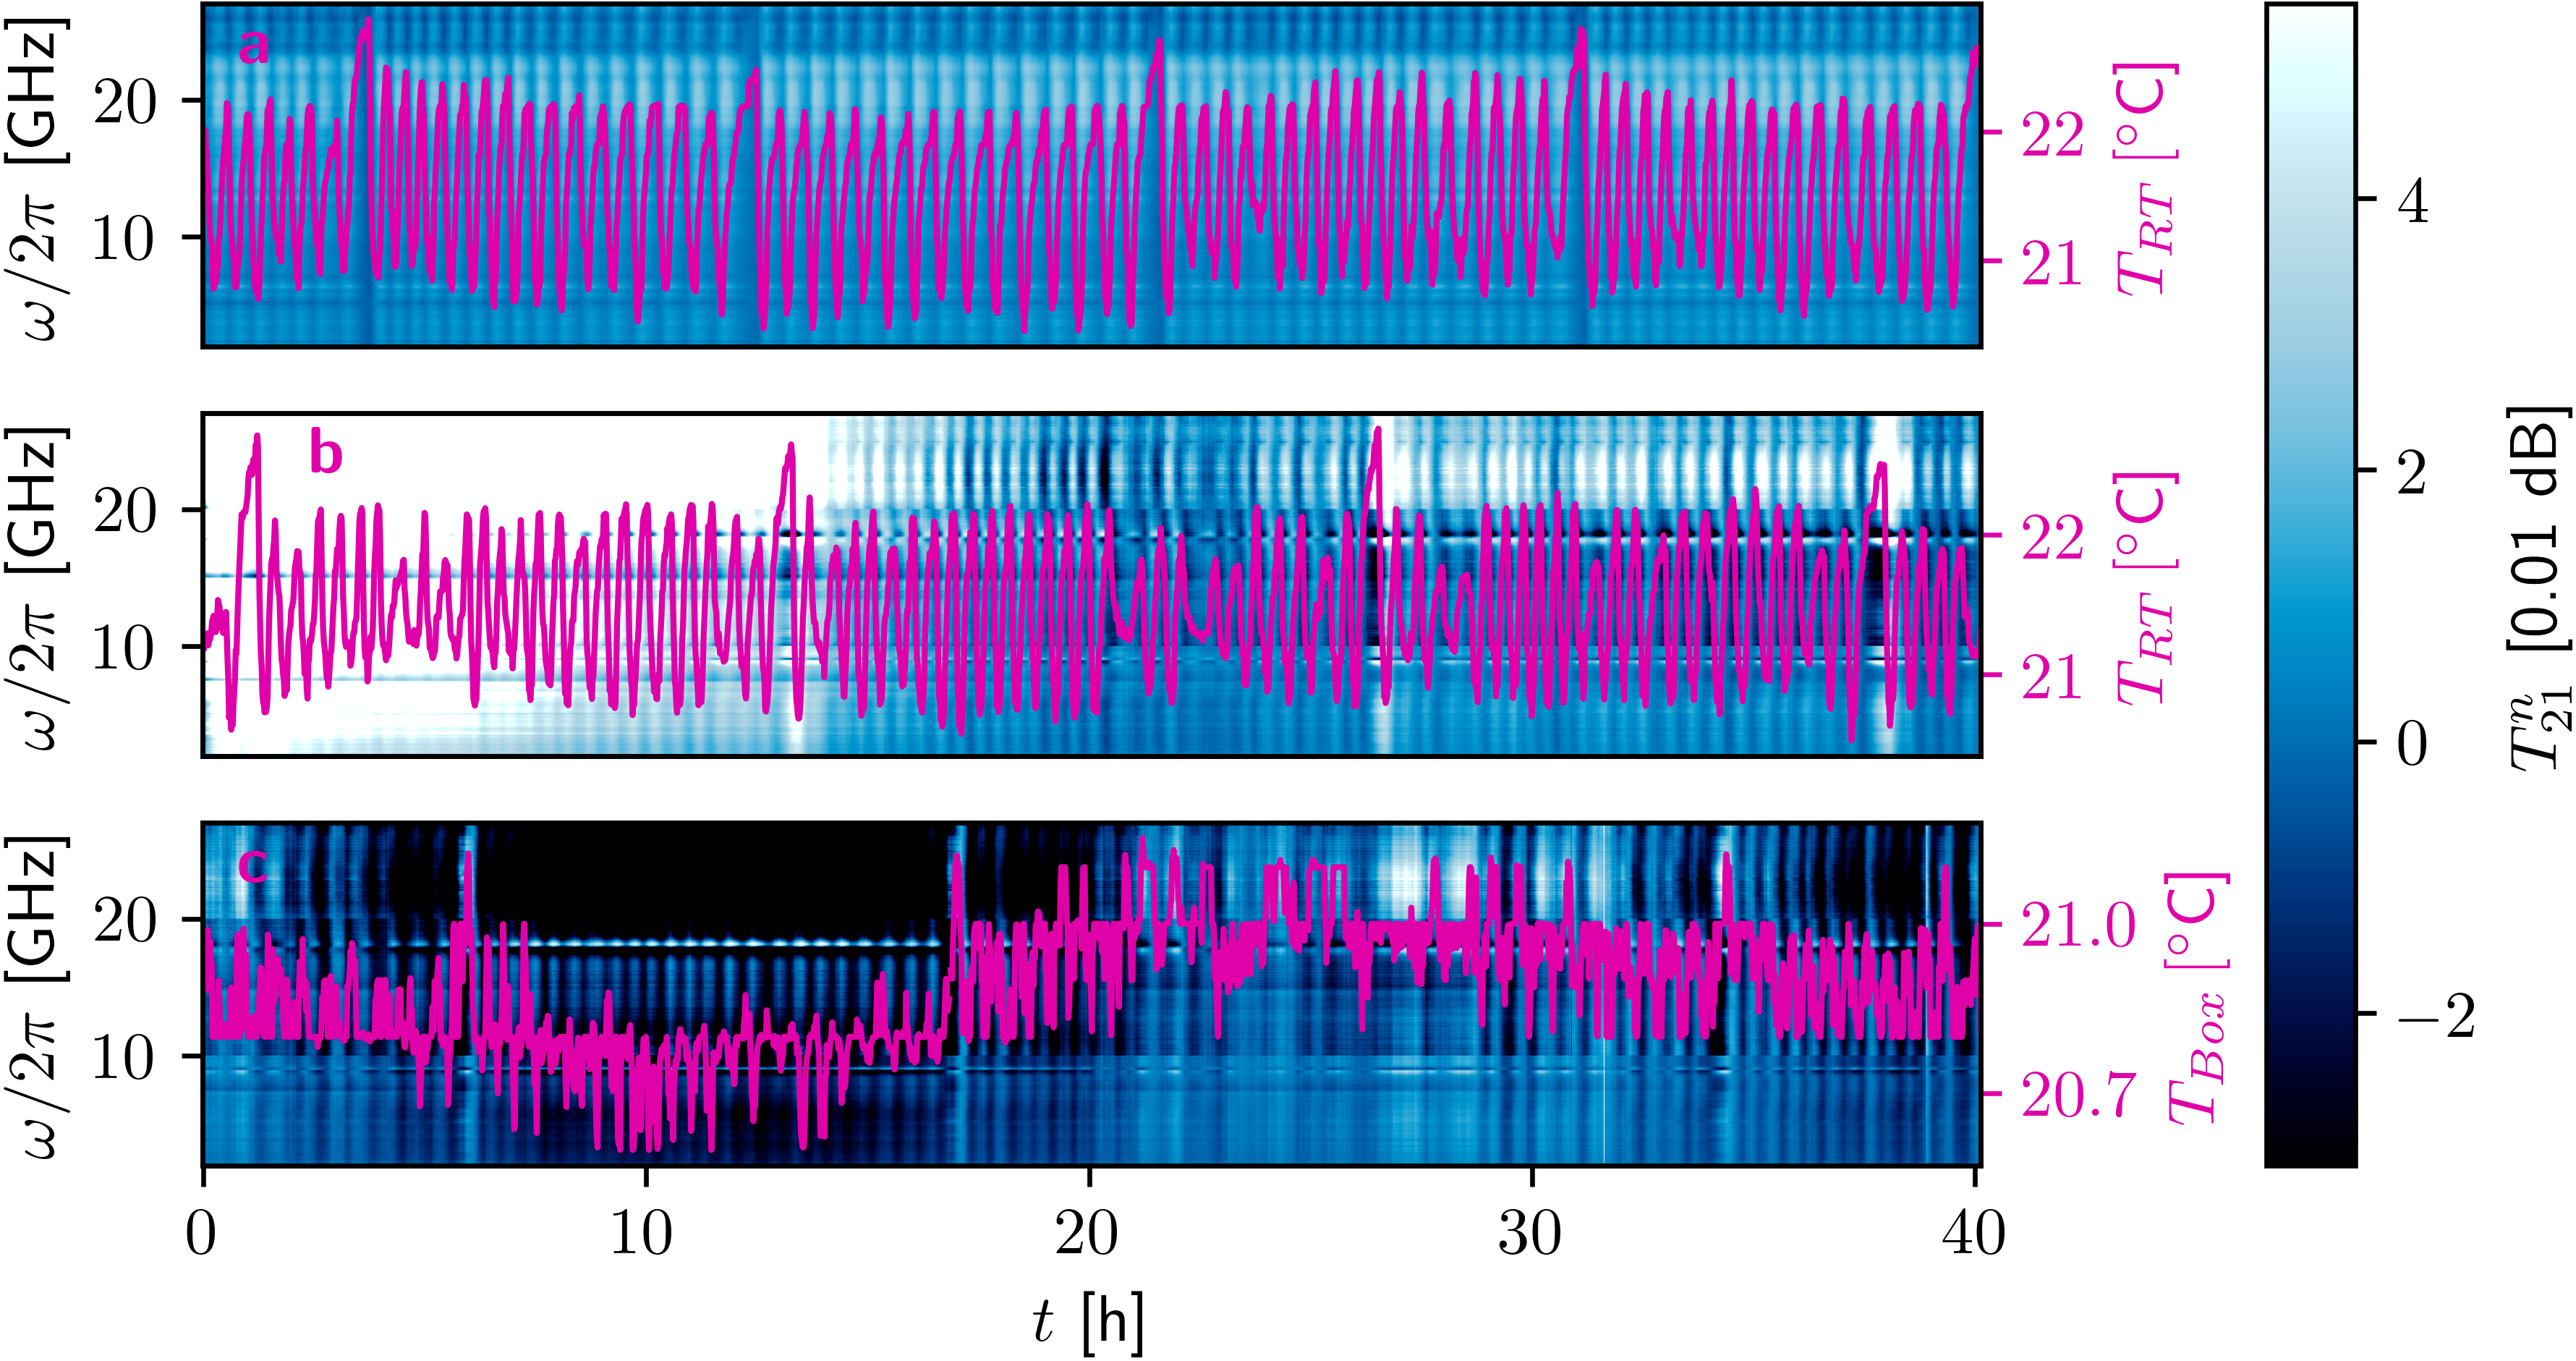

In [28]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, ax = plt.subplots(ncols=2,nrows=3,
                       gridspec_kw={"width_ratios":[4,.2],
                                    "height_ratios":[1,1,1]},
                       figsize=(6,3.2),
                       #sharex=True,
                       constrained_layout=True)
ax_wopa=ax[0,0]
ax_pa=ax[1,0]
ax_bpa=ax[2,0]
# ax_wopa_clb=ax[0,1]
# ax_pa_clb=ax[1,1]
# ax_bpa_clb=ax[2,1]

im_wopa = ax_wopa.imshow(img_wopa, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_wopa_2=ax_wopa.twinx()
ax_wopa_2.plot(t,T_wopa, color=cpd.curves(color='magenta')(1))
#fig.colorbar(im_wopa,label=clabel_wopa, cax=ax_wopa_clb)

im_pa = ax_pa.imshow(img_pa, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_pa_2=ax_pa.twinx()
ax_pa_2.plot(t,T_pa, color=cpd.curves(color='magenta')(1))
#fig.colorbar(im_pa,label=clabel_pa, cax=ax_pa_clb)

im_bpa = ax_bpa.imshow(img_bpa, 
                   extent=ext, 
                   aspect='auto',
                   origin='lower',
                   clim=clim,
                   cmap=cpd.images())
ax_bpa_2=ax_bpa.twinx()
ax_bpa_2.plot(t*40/38,T_bpa, color=cpd.curves(color='magenta')(1))
#fig.colorbar(im_bpa,label=clabel_bpa, cax=ax_bpa_clb)
ax_bpa_2.set_xlim([ext[0],ext[1]])

ax_wopa.set_xticks([])
ax_wopa.set_xticklabels([])
ax_wopa.set_ylabel(ylabel)
ax_wopa_2.set_ylabel('$T_{RT}\,[^\circ$C]',
                      color=cpd.curves(color='magenta')(1))
ax_wopa_2.tick_params(axis='y',
                      labelcolor=cpd.curves(color='magenta')(1),
                      color=cpd.curves(color='magenta')(1))

ax_pa.set_xticks([])
ax_pa.set_xticklabels([])
ax_pa.set_ylabel(ylabel)
ax_pa_2.set_ylabel('$T_{RT}\,[^\circ$C]',
                      color=cpd.curves(color='magenta')(1))
ax_pa_2.tick_params(axis='y',
                      labelcolor=cpd.curves(color='magenta')(1),
                      color=cpd.curves(color='magenta')(1))


ax_bpa.set_xlabel('$t$ [h]')
ax_bpa.set_ylabel(ylabel)
ax_bpa_2.set_ylabel('$T_{Box}\,[^\circ$C]',
                      color=cpd.curves(color='magenta')(1))
ax_bpa_2.tick_params(axis='y',
                      labelcolor=cpd.curves(color='magenta')(1),
                      color=cpd.curves(color='magenta')(1))
ax_bpa_2.set_yticks([21,20.7])


gs = ax[0, 1].get_gridspec()
for a in ax[:,1]:
    a.remove()
ax_clb = fig.add_subplot(gs[:,1])


ax_wopa.annotate(r'\textbf{a}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_pa.annotate(r'\textbf{b}',xy=(0, 1), xycoords='axes fraction',xytext=(150, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')
ax_bpa.annotate(r'\textbf{c}',xy=(0, 1), xycoords='axes fraction',xytext=(50, -100),color=cpd.curves(color='magenta')(1),
                  textcoords='offset pixels',horizontalalignment='left',verticalalignment='bottom')

#ax_clb=ax[0:2,1]
fig.colorbar(im_wopa, cax=ax_clb,label=clabel_bpa)#, ticks=clim)
fig.savefig('temp.pgf')

In [13]:
print('\nwopa dT21 FWHM: %3.2f *0.01dB'%(2*np.nanstd(np.nanmean(img_wopa, axis=0))),
      '\nwopa dT FWHM: %3.2f C'%(2*np.nanstd(T_wopa)),
     '\nwopa dT21/dT: %3.2f *0.01dB/C'%(np.nanstd(np.nanmean(img_wopa, axis=0))/np.nanstd(T_wopa)))
print('\npa dT21 FWHM ohne preheat: %3.2f *0.01dB'%(2*np.nanstd(np.nanmean(img_pa[:,800:], axis=0))),
      '\npa dT21 FWHM: %3.2f *0.01dB'%(2*np.nanstd(np.nanmean(img_pa, axis=0))),
      '\npa dT FWHM: %3.2f C'%(2*np.nanstd(T_pa)),
     '\npa dT21/dT: %3.2f *0.01dB/C'%(np.nanstd(np.nanmean(img_pa, axis=0))/np.nanstd(T_pa)))
print('\nbpa dT21 FWHM: %3.2f *0.01dB'%(2*np.nanstd(np.nanmean(img_bpa, axis=0))),
      '\nbpa dT FWHM: %3.2f C'%(2*np.nanstd(T_bpa)),
     '\nbpa dT21/dT: %3.2f *0.01dB/C'%(np.nanstd(np.nanmean(img_bpa, axis=0))/np.nanstd(T_wopa)))


wopa dT21 FWHM: 0.79 *0.01dB 
wopa dT FWHM: 1.08 C 
wopa dT21/dT: 0.73 *0.01dB/C

pa dT21 FWHM ohne preheat: 2.56 *0.01dB 
pa dT21 FWHM: 9.47 *0.01dB 
pa dT FWHM: 0.90 C 
pa dT21/dT: 10.57 *0.01dB/C

bpa dT21 FWHM: 3.27 *0.01dB 
bpa dT FWHM: 0.22 C 
bpa dT21/dT: 3.02 *0.01dB/C


In [14]:
np.shape(np.nanmean(img_wopa, axis=0))

(2401,)

In [15]:
dataset_hsweep='BF Cobulky32nm HSWEEP down'
dataset_fsweep='BF Cobulky32nm LONG'
d_hsweep=FMR_Reader.read(dataset_hsweep, loc='../../../messungen/')
d_fsweep=FMR_Reader.read(dataset_fsweep, loc='../../../messungen/')

100%|██████████| 153/153 [00:21<00:00,  7.15it/s]


geometric averaging already happend


100%|██████████| 5201/5201 [01:22<00:00, 63.34it/s]


In [16]:
d_hsweep,d_fsweep

({'version': 'version from 20210422',
  'T21': array([[-0.13370899, -0.1335734 , -0.13361044, ..., -0.13587969,
          -0.13616474, -0.13607839],
         [-0.12735579, -0.12723446, -0.12729101, ..., -0.12166392,
          -0.12182733, -0.12160664],
         [-0.16875091, -0.1685878 , -0.16854512, ..., -0.16568051,
          -0.16575682, -0.16558405],
         ...,
         [-1.24161853, -1.26310401, -1.27608946, ..., -1.24447815,
          -1.24731423, -1.22059277],
         [-0.98517795, -0.93575227, -0.98316703, ..., -0.99762423,
          -0.97800745, -0.96549504],
         [-1.33015665, -1.34552408, -1.46653993, ..., -1.42365908,
          -1.44835503, -1.37655878]]),
  'phi21': array([[ -1.49980131,  -1.49981143,  -1.49943318, ...,  -1.46479465,
           -1.46469905,  -1.46479412],
         [ -1.72189791,  -1.72217165,  -1.72159091, ...,  -1.72373277,
           -1.7240472 ,  -1.72365392],
         [ -2.87019006,  -2.87127338,  -2.8695184 , ...,  -2.86219257,
           -2.8

In [17]:
Hmin=-.1
Hmax=1.1
fmin=2
fmax=40
db_hsweep=FMR_eva.binning(d_hsweep, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax)
db_fsweep=FMR_eva.complex_binning(d_fsweep, Hmin=Hmin, Hmax=Hmax, fmin=fmin, fmax=fmax, NH=(Hmax-Hmin)*1000+1)

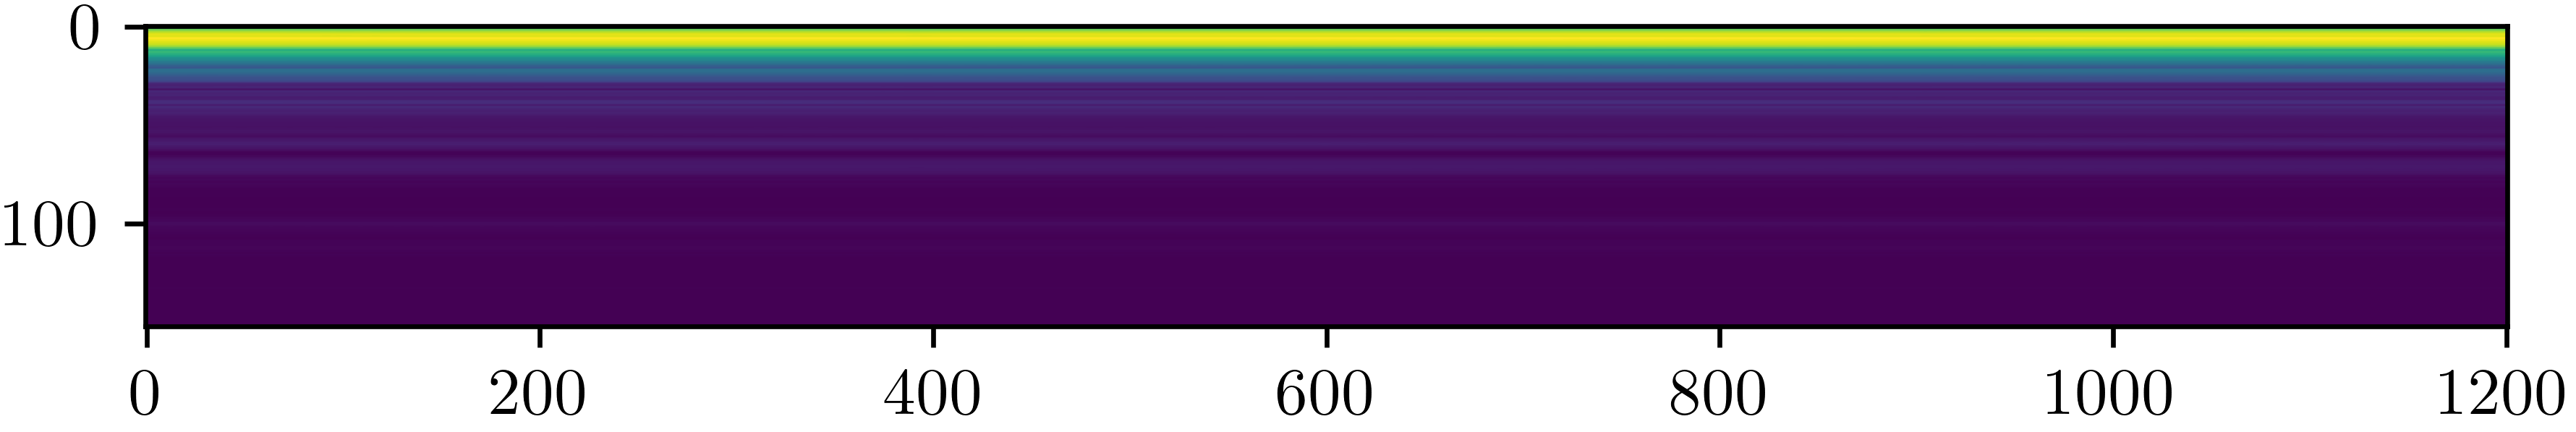

In [18]:
plt.imshow(np.abs(db_fsweep['S21']))

In [19]:
Hnorm=[1.05]
dn_hsweep=FMR_eva.normT21(db_hsweep, Hnorm=Hnorm)
dn_fsweep=FMR_eva.normS21(db_fsweep, Hnorm=Hnorm)
#dn_bf_up,dn_bf_down,dn_fh_up,dn_fh_down

In [20]:
np.abs(dn_fsweep['S21'])

array([[1.00009538, 1.00003983, 0.99999711, ..., 1.00051027, 1.00053204,
        1.00054404],
       [0.9999354 , 0.99989013, 0.99984202, ..., 1.00043686, 1.00044771,
        1.00045769],
       [0.99989894, 0.99984339, 0.99979556, ..., 1.00048161, 1.00050428,
        1.00051007],
       ...,
       [0.99563982, 0.99613922, 0.99968819, ..., 0.99803976, 1.0006087 ,
        1.0007741 ],
       [1.00116656, 1.00154998, 1.00276346, ..., 1.00301724, 1.00166639,
        1.00099379],
       [1.00397095, 1.00223194, 0.99913642, ..., 1.0043229 , 1.00256896,
        0.99903988]])

(-0.02, 0.01)

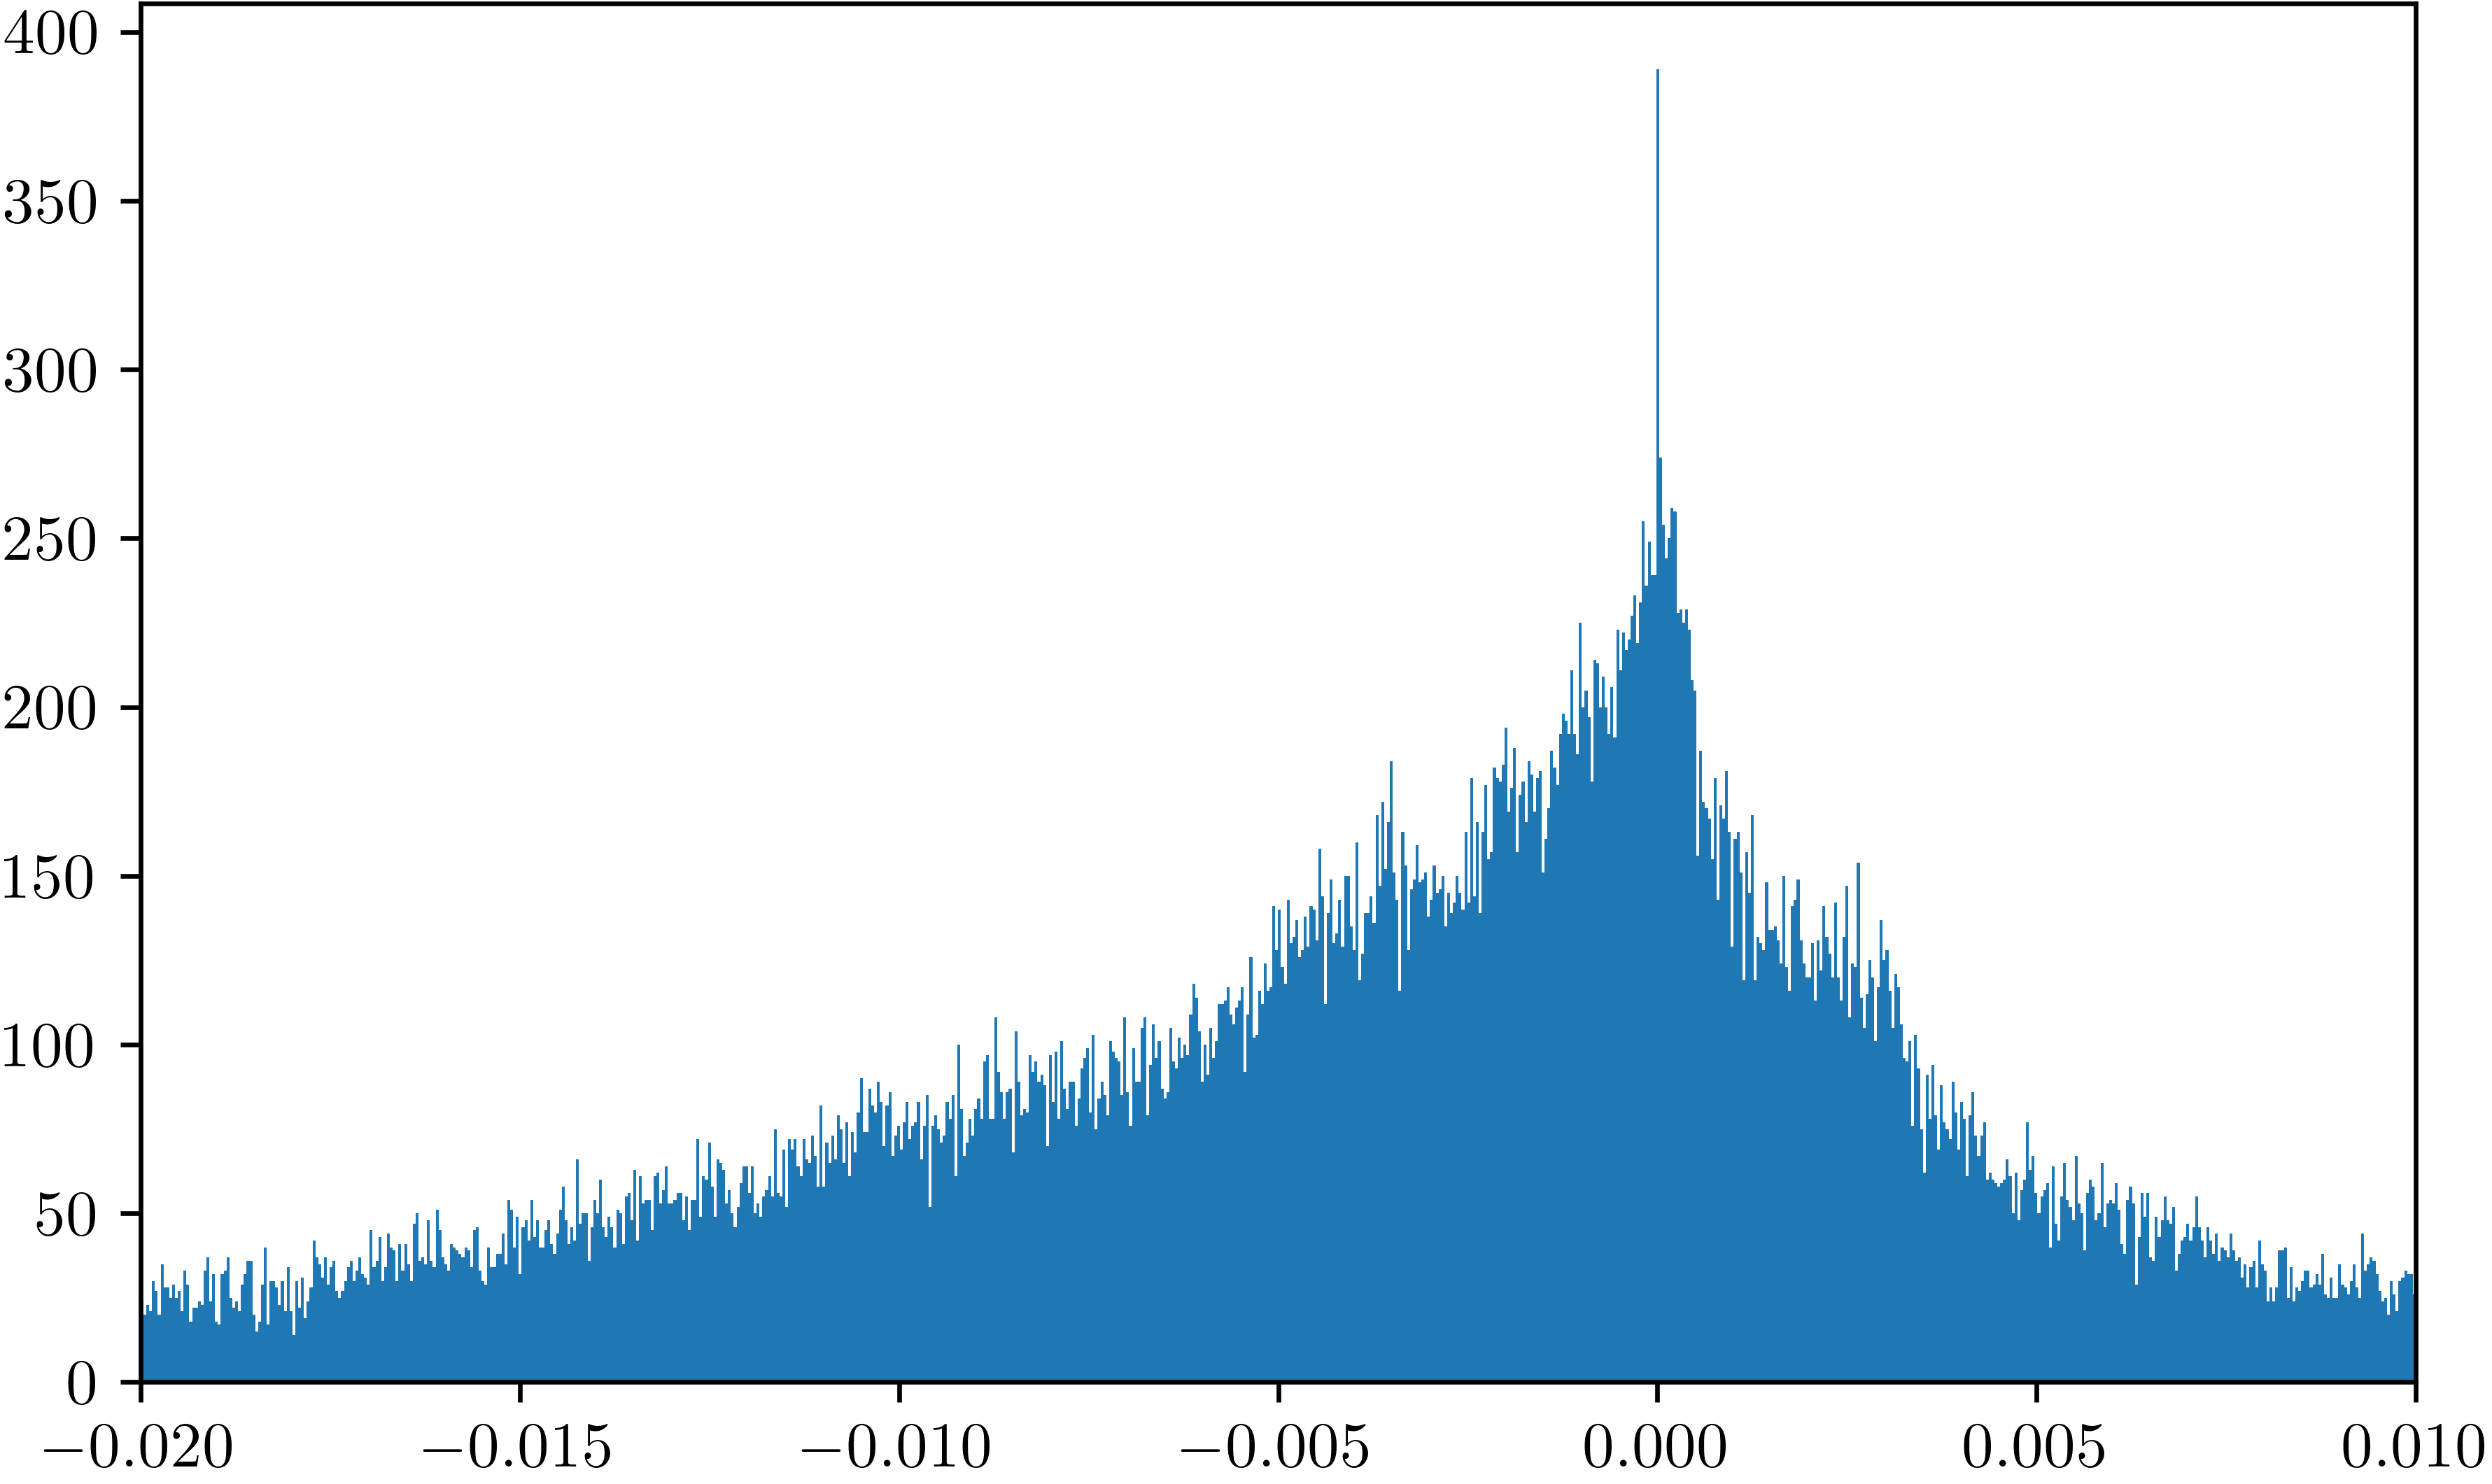

In [21]:
%matplotlib inline
style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img=dn_hsweep['T21']
plt.hist(np.ravel(img), bins=10000)
plt.xlim([-.02,.01])

<Figure size 3600x2160 with 0 Axes>

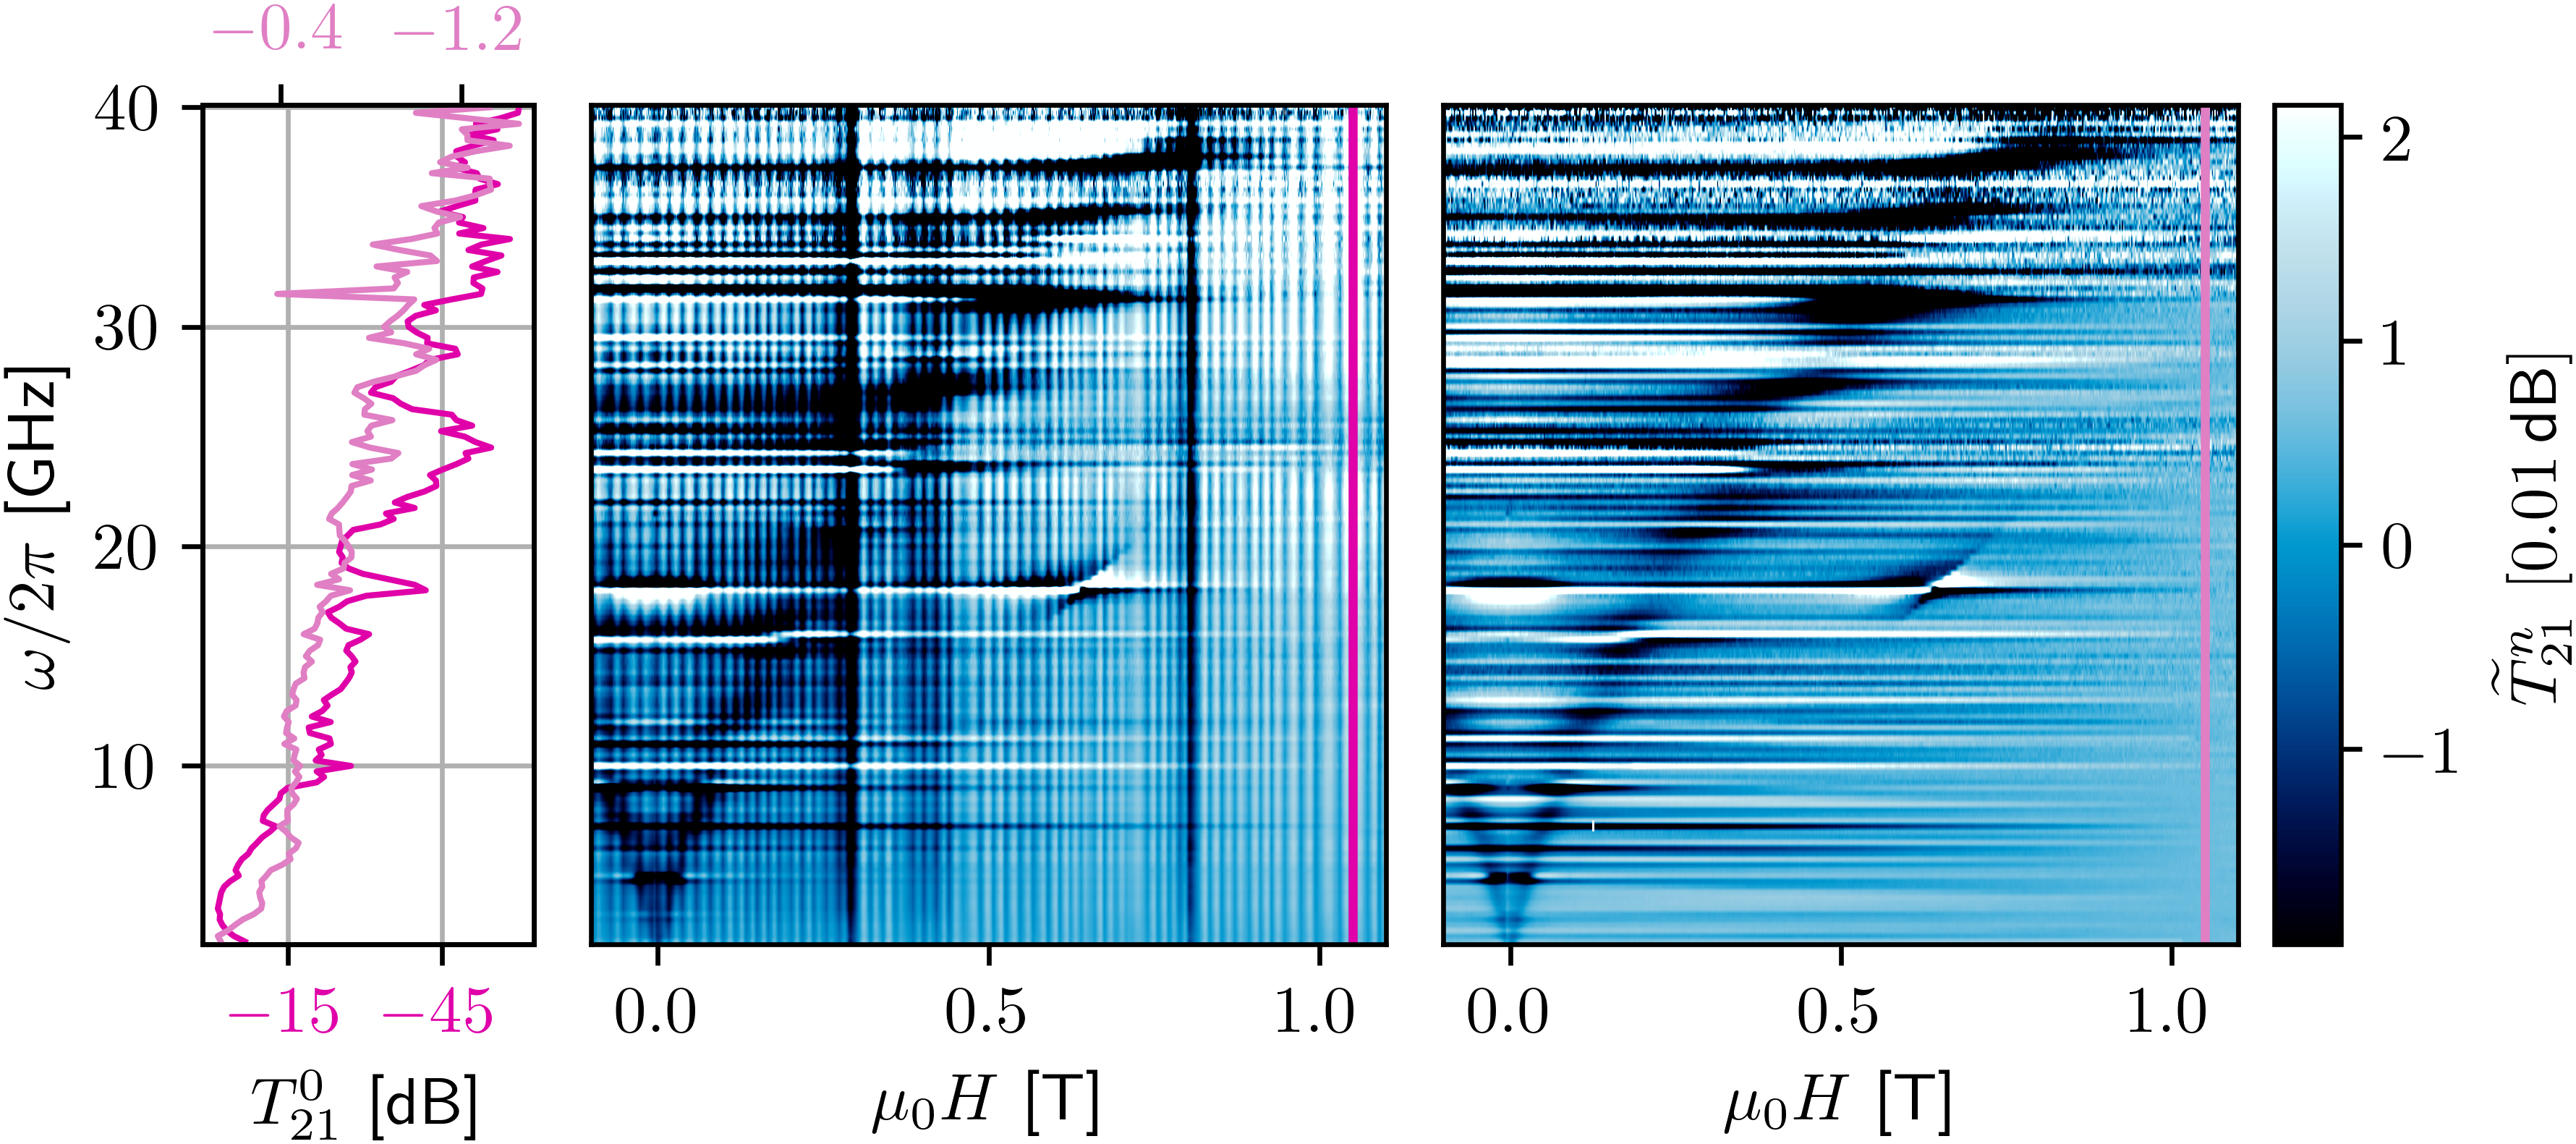

In [22]:

style='../driver/thesis_half'
plt.style.use('%s.mplstyle'%style)

img0=20*np.log10(np.abs(dn_fsweep['S21']))*100
norm0=20*np.log10(np.abs(dn_fsweep['S21norm']))
posN0=dn_fsweep['Hnorm']
H0=dn_fsweep['H']
freq0=dn_fsweep['f']

img1=dn_hsweep['T21']*100
norm1=dn_hsweep['T21norm']
posN1=dn_hsweep['Hnorm']
H1=dn_hsweep['H']
freq1=dn_hsweep['f']

Hlim=(-1.5,1.5)
flim=(0,40)
contrast=1
fig_nr=0

xlabel='$\mu_0H$ [T]'
ylabel='$\omega/2\pi$ [GHz]'
nlabel='$T_{21}^0$ [dB]'
clabel='$\widetilde{T}^n_{21}\ [0.01\,$dB$]$'
normticks=[0,-40]
filename=False
subpath=False
    
# correct image framing
stepsizeH0=np.abs(H0[0]-H0[1])/2
stepsizef0=np.abs(freq0[-1]-freq0[-2])/2
Hind0=[np.abs(H0-Hlim[0]).argmin(),
      np.abs(H0-Hlim[1]).argmin()+1]
find0=[np.abs(freq0-flim[0]).argmin(),
      np.abs(freq0-flim[1]).argmin()+1]
img0=img0[find0[0]:find0[1],
        Hind0[0]:Hind0[1]]
ext0=[H0[Hind0[0]]-stepsizeH0,
     H0[Hind0[1]-1]+stepsizeH0,
     freq0[find0[0]]-stepsizef0,
     freq0[find0[1]-1]+stepsizef0]
freq0=freq0[find0[0]:find0[1]]
H0=H0[Hind0[0]:Hind0[1]]

stepsizeH1=np.abs(H1[0]-H1[1])/2
stepsizef1=np.abs(freq1[-1]-freq1[-2])/2
Hind1=[np.abs(H1-Hlim[0]).argmin(),
      np.abs(H1-Hlim[1]).argmin()+1]
find1=[np.abs(freq1-flim[0]).argmin(),
      np.abs(freq1-flim[1]).argmin()+1]
img1=img1[find1[0]:find1[1],
        Hind1[0]:Hind1[1]]
ext1=[H1[Hind1[0]]-stepsizeH1,
     H1[Hind1[1]-1]+stepsizeH1,
     freq1[find1[0]]-stepsizef1,
     freq1[find1[1]-1]+stepsizef1]
freq1=freq1[find1[0]:find1[1]]
H1=H1[Hind1[0]:Hind1[1]]

#img=np.dstack((img0.flatten,img1.flatten))
img0[img0==-np.inf]=np.nan
img0[img0==np.inf]=np.nan
clim0=(np.nanmean(img0)-contrast*np.nanstd(img0),
      np.nanmean(img0)+contrast*np.nanstd(img0))
img1[img1==-np.inf]=np.nan
img1[img1==np.inf]=np.nan
clim1=(np.nanmean(img1)-contrast*np.nanstd(img1),
      np.nanmean(img1)+contrast*np.nanstd(img1))
clim=((clim0[0]+clim1[0])/2,(clim0[1]+clim1[1])/2)
# clim1=(-.025,.025)
# img0=(img0-clim0[1])/clim0[0]
# clim0=(0,1)

plt.close(fig_nr)
fig=plt.figure(fig_nr)

fig, (ax_norm, ax_img0, ax_img1, ax_clb) = plt.subplots(ncols=4,figsize=(6,2.7),
                                    gridspec_kw={"width_ratios":[1,2.4,2.4,.2]},
                                    constrained_layout=True)        

norm0=norm0[find0[0]:find0[1]]
ax_norm.plot(norm0,freq0,c=cpd.curves(color='magenta')(1))   
ax_norm.set_ylabel(ylabel)
ax_norm.set_xlabel(nlabel)
ax_norm.set_ylim(ext0[2],ext0[3])
ax_norm.grid()
ax_norm.invert_xaxis()
ax_norm.tick_params(axis='x', labelcolor=cpd.curves(color='magenta')(1))

ax_norm_2=ax_norm.twiny()
norm1=norm1[find1[0]:find1[1]] 
ax_norm_2.plot(norm1,freq1,c=cpd.images(color='magenta')(.65)) 
ax_norm_2.invert_xaxis()
ax_norm_2.set_xticks([-.4,-1.2])
ax_norm_2.tick_params(axis='x', labelcolor=cpd.images(color='magenta')(.65))

nlim0=[np.min(norm0),np.max(norm0)]
enn0=np.abs(nlim0[1]-nlim0[0])/4
nlim0=np.around(([(nlim0[0]+enn0)*2,(nlim0[1]-enn0)*2]),decimals=-1)/2
ax_norm.set_xticks(nlim0)

# Take care of image and colorbar   
ax_img0.set_yticks([])
ax_img0.set_yticklabels([])
im0 = ax_img0.imshow(img0, 
                   extent=ext0, 
                   aspect='auto',
                   origin='lower',
                   clim=clim0,
                   cmap=cpd.images())
ax_img0.set_xlabel(xlabel)
ax_img0.vlines(posN0, ymin=ext0[2], ymax=ext0[3], lw=1.5,
             color=cpd.curves(color='magenta')(1),
             label="$H_n=%3.2f\,$T"%float(posN0))

ax_img1.set_yticks([])
ax_img1.set_yticklabels([])
im1 = ax_img1.imshow(img1, 
                   extent=ext1, 
                   aspect='auto',
                   origin='lower',
                   clim=clim1,
                   cmap=cpd.images())
ax_img1.set_xlabel(xlabel)
ax_img1.vlines(posN1, ymin=ext1[2], ymax=ext1[3], lw=1.5,
             color=cpd.images(color='magenta')(.65),
             label="$H_n=%3.2f\,$T"%float(posN1))

#ax_norm.text(nlim[0],ext[2]+(ext[3]-ext[2])/20, rotation='vertical',
# fig.text(.805,.035,
#             "$H_n=%3.2f\,$T"%float(posN0),
#             color=cpd.curves(color='magenta')(1),
#             bbox=dict(facecolor='white', 
#                       edgecolor=cpd.curves(color='magenta')(1), 
#                       boxstyle='round'))
#ax_clb.set_xticks([0])
# ax_clb.set_xlabel("$H_n=%3.2f\,$T"%float(posN),
#              color=cpd.curves(color='seeblau')(1))

#ax_img0.set_xticks(np.linspace(.1,.9,5))
#ax_img0.set_xticks(list(ax_img.get_xticks()))
#ax_img.get_xticklabels()[-1].set_color(cpd.images(color='magenta')(.5))

ax_img0.set_xlim(ext0[0],ext0[1])
ax_img0.set_ylim(ext0[2],ext0[3])

cbar=fig.colorbar(im0,label=clabel, cax=ax_clb)

fig.savefig('hf_sweep.pgf')

In [21]:
img0, np.nanmin(img0), np.nanmax(img0)

(array([[-5.30579077e-03, -5.54519313e-03, -5.84394363e-03, ...,
         -5.51047624e-04, -3.76202707e-05,  4.17592251e-04],
        [-5.26226505e-03, -5.47773572e-03, -5.71126789e-03, ...,
         -3.68339001e-04,  1.27434560e-04,  6.39121990e-04],
        [-5.88631356e-03, -6.13307669e-03, -6.41098024e-03, ...,
          2.53421710e-04,  7.68118526e-04,  1.25412823e-03],
        ...,
        [-2.84488139e-02, -3.78068524e-02, -3.06310581e-02, ...,
          4.85820023e-02,  3.93675184e-02,  4.87750558e-02],
        [-1.48695400e-02, -3.61235276e-02, -1.09903751e-02, ...,
         -1.32948998e-02, -1.66852893e-02, -3.21881695e-02],
        [-9.41692931e-03,  2.36787547e-02,  1.22278394e-02, ...,
          4.59065313e-02,  8.70323458e-02,  4.05890862e-02]]),
 -0.20691736854501608,
 0.17661016222344506)

In [14]:
def binning(d, 
           fmin=False,
           fmax=False,
           Hmin=False,
           Hmax=False,
           Nf=False,
           NH=False):
    
    # Get Binning extent
    if Hmin is False:
        Hmin=np.nanmin(d['H'])
    if Hmax is False:
        Hmax=np.nanmax(d['H'])
    if fmin is False:
        fmin=np.nanmin(d['f'])
    if fmax is False:
        fmax=np.nanmax(d['f'])
    ext=[[Hmin,Hmax], [fmin,fmax]]
        
    # Get Binning resolution
    checkH=np.argmin(np.abs(d['H']-Hmax))-np.argmin(np.abs(d['H']-Hmin))+1
    if NH is False:NH=checkH
    elif NH>checkH:print('Error: Oversampling in H-direction!')
        
    checkf=np.argmin(np.abs(d['f']-fmax))-np.argmin(np.abs(d['f']-fmin))+1
    if Nf is False:Nf=checkf
    elif Nf>checkf:print('Error: Oversampling in f-direction!')
    res=[NH,Nf]
    
    # Get 2D grids
    abso=d['T21']
    HH, ff =np.meshgrid(d['H'],d['f'])
    
    # from 2D grids, to 1D rows
    X, Y = np.ravel(HH), np.ravel(ff)
    Zabso = np.ravel(abso)
    
    # Bin that stuff
    abso_SUM, x,y = np.histogram2d(X,Y,
                                   bins=res, 
                                   range=ext, 
                                   normed=False, 
                                   weights=Zabso)
    counter, x,y = np.histogram2d(X,Y,
                                  bins=res, 
                                  range=ext, 
                                  normed=False, 
                                  weights=None)
    
    # get that binned stuff back together.
    db={'ext(H,f)':[Hmin,Hmax,fmin,fmax],
        'res(H,f)':[NH,Nf]}
    db['T21']=abso_SUM.T/counter.T
    db['f']=np.linspace(fmin,fmax,Nf)
    db['H']=np.linspace(Hmin,Hmax,NH)
    return db

In [21]:
def normT21(db,Hnorm='max'):
    '''
    db: H,f,S21
    Hnorm: 'max', 'min', 'ext', [-1,1]
    
    return
    dn: H, Hnorm, S21, S21norm, f
    '''
    
    H=db['H']
    abso=db['T21']
    
    # get Positions
    if Hnorm=='max':
        pos=[np.argmin(np.abs(H-np.nanmax(H)))]
    elif Hnorm=='min':
        pos=[np.argmin(np.abs(H-np.nanmin(H)))]
    elif Hnorm=='ext':
        pos=[np.argmin(np.abs(H-np.nanmax(H))),
             np.argmin(np.abs(H-np.nanmin(H)))]
    else:
        pos= [0 for x in range(len(Hnorm))]
        for i,h in enumerate(Hnorm):
            pos[i]=np.argmin(np.abs(H-h))
    
    
    
    # get Normalization
    lenpos=len(pos)
    Habso=0
    Hnorm=[]
    for p in pos:
        Habso=Habso+abso[:,p]/lenpos
        Hnorm.append(H[pos])
        
    # gridden
    X = np.ones((len(H)))
    ones, HHabso   = np.meshgrid(X,Habso)
    
    # Normen
    HHT21=HHabso
    norm=1/np.abs(HHT21)
    abso=abso*norm
    
    # Build normated Dataset
    dn={}
    dn['H']=H
    dn['Hnorm']=np.array(Hnorm)
    dn['T21']=abso
    dn['T21norm']=Habso
    dn['f']=db['f']
    
    return dn